In [1]:
%matplotlib widget

import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
import matplotlib_extras as mplx
import matplotlib_extras.animation
import matplotlib_extras.lines

In [3]:
import ooep
import ooep.utils
import ooep.ems

In [8]:
env = ooep.ems.Environment().__enter__()

In [9]:
tmeter = env.variable(dict(
    variable_name='People Air Temperature',
    variable_key='CORE_MID'
))

tstat_cool = env.actuator(dict(
    component_type='Zone Temperature Control',
    control_type='Cooling Setpoint',
    actuator_key='CORE_MID'
))

tstat_heat = env.actuator(dict(
    component_type='Zone Temperature Control',
    control_type='Heating Setpoint',
    actuator_key='CORE_MID'
))

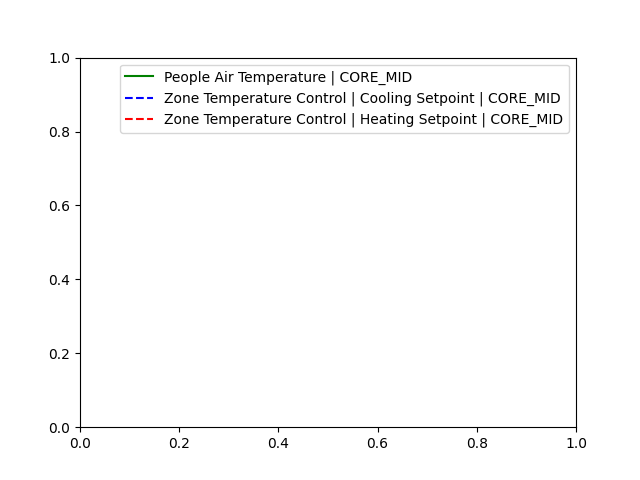

In [10]:
plt.ion()
fig, ax = plt.subplots()

animation = mplx.animation.FigureAnimation(
    fig, 
    [
        ax.add_artist(
            mplx.lines.SimpleLine2D(
                label=tmeter.name,
                linestyle='-', 
                color='g'
            )
            .autofit()
            .on_step('append_data_1d', lambda: tmeter.value)
        ),
        ax.add_artist(
            mplx.lines.SimpleLine2D(
                label=tstat_cool.name,
                linestyle='--', 
                color='b'
            )
            .autofit()
            .on_step('append_data_1d', lambda: tstat_cool.value)
        ),
        ax.add_artist(
            mplx.lines.SimpleLine2D(
                label=tstat_heat.name,
                linestyle='--', 
                color='r'
            )
            .autofit()
            .on_step('append_data_1d', lambda: tstat_heat.value)
        )
    ]
)
ax.legend()

def _f_callback():
    if env.warming_up:
        return
    try: animation.step()
    except ooep.ems.NotReadyError: pass

env.event(
    dict(event_name='begin_zone_timestep_after_init_heat_balance')
    #dict(event_name='after_component_input')
).callback = _f_callback

In [11]:
# TODO async
env(
    # TODO
    #'--design-day',
    #'--annual',
    '--output-directory', 'build/demo-eplus',
    '--weather', f'{ooep.utils.energyplus.dataset.weathers}/USA_FL_Tampa.Intl.AP.722110_TMY3.epw',
    f'{ooep.utils.energyplus.dataset.models}/ASHRAE901_OfficeLarge_STD2019_Denver_Chiller205_Detailed.idf'
)

In [ ]:
env.__exit__()